In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../experiments/runs/907771f2-f139-4005-ac1b-801161b399e4/output.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df["day"] = df["datetime"].dt.date

In [5]:
df.tail(50)

,datetime,product,display,num_slots,quantity_sold,price,revenue,day
2,2021-05-01 12:00:00,Monster_16oz_can,dairy-cooler,9,10.0,2.99,29.90,2021-05-01
3,2021-05-01 12:00:00,dr_pepper_20oz_bottle,deli-cooler,1,1.0,0.99,0.99,2021-05-01
4,2021-05-01 12:00:00,diet_coke_20oz_bottle,deli-cooler,1,1.0,1.99,1.99,2021-05-01
5,2021-05-01 12:00:00,sprite_20oz_bottle,deli-cooler,5,3.0,1.99,5.97,2021-05-01
6,2021-05-01 12:00:00,Monster_16oz_can,deli-cooler,3,10.0,2.99,29.90,2021-05-01
7,2021-05-02 12:00:00,coca_cola_20oz_bottle,dairy-cooler,1,0.0,1.99,0.00,2021-05-02
8,2021-05-02 12:00:00,diet_coke_20oz_bottle,dairy-cooler,2,2.0,1.99,3.98,2021-05-02
9,2021-05-02 12:00:00,sprite_20oz_bottle,dairy-cooler,1,0.0,1.99,0.00,2021-05-02
10,2021-05-02 12:00:00,Monster_16oz_can,dairy-cooler,6,45.0,2.99,134.55,2021-05-02
11,2021-05-02 12:00:00,coca_cola_20oz_bottle,deli-cooler,1,0.0,1.99,0.00,2021-05-02


In [6]:
# standardize
mu = df["revenue"].mean()
sig = df["revenue"].std()
df['revenue'] = (df['revenue'] - mu) / sig

# standardize
mu = df["quantity_sold"].mean()
sig = df["quantity_sold"].std()
df['quantity_sold'] = (df['quantity_sold'] - mu) / sig

In [7]:
df.head()

,datetime,product,display,num_slots,quantity_sold,price,revenue,day
0,2021-05-01 12:00:00,coca_cola_20oz_bottle,entrance-cooler,10,-0.611865,1.99,-0.657749,2021-05-01
1,2021-05-01 12:00:00,diet_coke_20oz_bottle,dairy-cooler,1,-0.611865,1.99,-0.657749,2021-05-01
2,2021-05-01 12:00:00,Monster_16oz_can,dairy-cooler,9,-0.218369,2.99,-0.210088,2021-05-01
3,2021-05-01 12:00:00,dr_pepper_20oz_bottle,deli-cooler,1,-0.724293,0.99,-0.750910,2021-05-01
4,2021-05-01 12:00:00,diet_coke_20oz_bottle,deli-cooler,1,-0.724293,1.99,-0.732203,2021-05-01


In [8]:
groups = df[['display','product','num_slots','quantity_sold', 'revenue']].groupby(["display","product"]).mean()

In [9]:
groups.reset_index(inplace=True)

In [10]:
groups

,display,product,num_slots,quantity_sold,revenue
0,dairy-cooler,Monster_16oz_can,8.875000,1.320483,1.321112
1,dairy-cooler,coca_cola_20oz_bottle,1.000000,-0.780506,-0.769430
2,dairy-cooler,diet_coke_20oz_bottle,1.333333,-0.649341,-0.682567
3,dairy-cooler,dr_pepper_20oz_bottle,1.000000,-0.780506,-0.769430
4,dairy-cooler,sprite_20oz_bottle,1.000000,-0.780506,-0.769430
5,deli-cooler,Monster_16oz_can,8.125000,0.364849,0.370230
6,deli-cooler,coca_cola_20oz_bottle,1.000000,-0.780506,-0.769430
7,deli-cooler,diet_coke_20oz_bottle,1.000000,-0.738346,-0.741510
8,deli-cooler,dr_pepper_20oz_bottle,1.000000,-0.752400,-0.760170
9,deli-cooler,sprite_20oz_bottle,2.333333,-0.724293,-0.732203


In [11]:
colors = {
    'Monster_16oz_can':'green', 
    'coca_cola_20oz_bottle':'red', 
    'diet_coke_20oz_bottle':'gray', 
    'dr_pepper_20oz_bottle':'orange',
    'sprite_20oz_bottle': 'blue'
}

Text(0, 0.5, 'quantity sold')

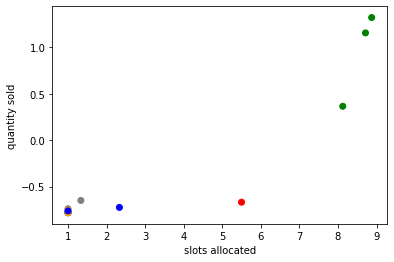

In [12]:
plt.scatter(groups["num_slots"], groups["quantity_sold"], c=groups['product'].map(colors))
plt.xlabel("slots allocated")
plt.ylabel("quantity sold")

Text(0, 0.5, 'total revenue')

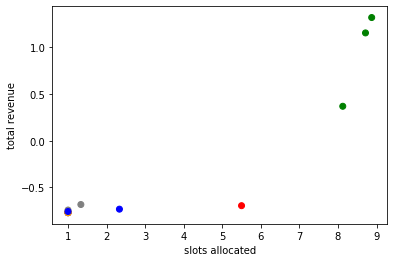

In [13]:
plt.scatter(groups["num_slots"], groups["revenue"],  c=groups['product'].map(colors))
plt.xlabel("slots allocated")
plt.ylabel("total revenue")

In [14]:
groups["q_sold_slope"] = groups['quantity_sold'] / groups['num_slots']
groups["revenue_slope"] = groups['revenue'] / groups['num_slots']

In [15]:
groups

,display,product,num_slots,quantity_sold,revenue,q_sold_slope,revenue_slope
0,dairy-cooler,Monster_16oz_can,8.875000,1.320483,1.321112,0.148787,0.148858
1,dairy-cooler,coca_cola_20oz_bottle,1.000000,-0.780506,-0.769430,-0.780506,-0.769430
2,dairy-cooler,diet_coke_20oz_bottle,1.333333,-0.649341,-0.682567,-0.487006,-0.511925
3,dairy-cooler,dr_pepper_20oz_bottle,1.000000,-0.780506,-0.769430,-0.780506,-0.769430
4,dairy-cooler,sprite_20oz_bottle,1.000000,-0.780506,-0.769430,-0.780506,-0.769430
5,deli-cooler,Monster_16oz_can,8.125000,0.364849,0.370230,0.044904,0.045567
6,deli-cooler,coca_cola_20oz_bottle,1.000000,-0.780506,-0.769430,-0.780506,-0.769430
7,deli-cooler,diet_coke_20oz_bottle,1.000000,-0.738346,-0.741510,-0.738346,-0.741510
8,deli-cooler,dr_pepper_20oz_bottle,1.000000,-0.752400,-0.760170,-0.752400,-0.760170
9,deli-cooler,sprite_20oz_bottle,2.333333,-0.724293,-0.732203,-0.310411,-0.313801


In [16]:
groups[['product', 'q_sold_slope', 'revenue_slope']].groupby("product").mean()

,q_sold_slope,revenue_slope
product,,
Monster_16oz_can,0.108738,0.109038
coca_cola_20oz_bottle,-0.560827,-0.555073
diet_coke_20oz_bottle,-0.668619,-0.674288
dr_pepper_20oz_bottle,-0.771137,-0.766344
sprite_20oz_bottle,-0.617562,-0.613418


## Slots over time

In [17]:
groups_time = df[['display','product','num_slots','datetime', 'day']].groupby(["day","product"]).mean()

In [18]:
groups_time.head()

num_slots
day        product                         
2021-05-01 Monster_16oz_can             6.0
           coca_cola_20oz_bottle       10.0
           diet_coke_20oz_bottle        1.0
           dr_pepper_20oz_bottle        1.0
           sprite_20oz_bottle           5.0

In [19]:
groups_time.reset_index(inplace=True)

In [20]:
groups_time

,day,product,num_slots
0,2021-05-01,Monster_16oz_can,6.000000
1,2021-05-01,coca_cola_20oz_bottle,10.000000
2,2021-05-01,diet_coke_20oz_bottle,1.000000
3,2021-05-01,dr_pepper_20oz_bottle,1.000000
4,2021-05-01,sprite_20oz_bottle,5.000000
5,2021-05-02,Monster_16oz_can,6.000000
6,2021-05-02,coca_cola_20oz_bottle,1.000000
7,2021-05-02,diet_coke_20oz_bottle,1.333333
8,2021-05-02,dr_pepper_20oz_bottle,1.000000
9,2021-05-02,sprite_20oz_bottle,1.000000


/opt/anaconda3/envs/allocation-rl/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


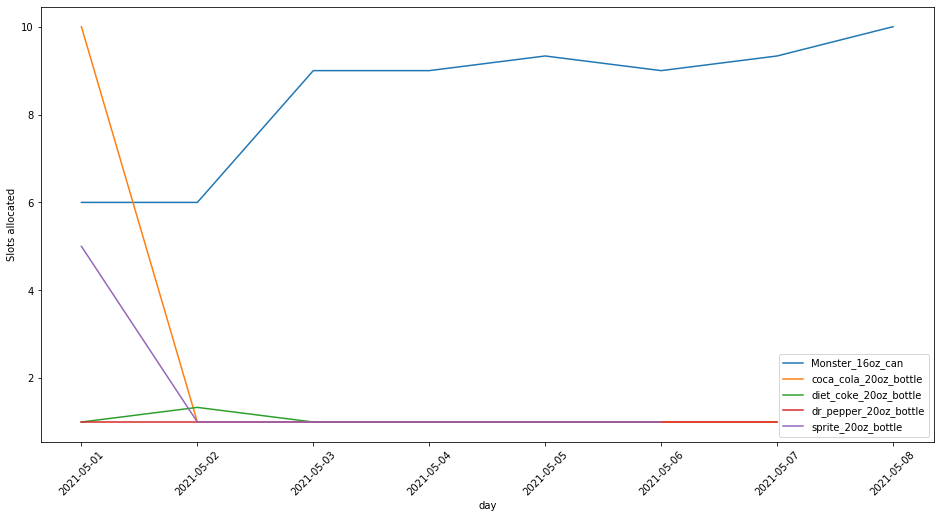

In [21]:
fig = plt.figure(figsize=(16,8))
for g, dta in groups_time.groupby("product"):
    plt.plot(dta['day'], dta["num_slots"], label=g)
plt.xticks(rotation=45)
plt.xlabel("day")
plt.ylabel("Slots allocated")
plt.legend(loc='best')